first thing is to import most relevant libraries to get started with.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('cars.csv')
df   # take first look of our data set.

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.
...,...,...,...,...,...,...,...,...
256,17.0,8,305,130,3840,15,1980,US.
257,36.1,4,91,60,1800,16,1979,Japan.
258,22.0,6,232,112,2835,15,1983,US.
259,18.0,6,232,100,3288,16,1972,US.


In [6]:
df.info()  #checkig the information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [8]:
df.head() # using head function ,it will give you the first 5 records by default unless you gave the no of records to show.

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [10]:
df.tail()  # using tail function ,it will give you the last 5 records by default unless you gave the no of records to show.

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
256,17.0,8,305,130,3840,15,1980,US.
257,36.1,4,91,60,1800,16,1979,Japan.
258,22.0,6,232,112,2835,15,1983,US.
259,18.0,6,232,100,3288,16,1972,US.
260,22.0,6,250,105,3353,15,1977,US.


In [12]:
df.sample() # using samplt method will give you a one random sample by default unless you mention the no of records.

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
48,29.0,4,97,78,1940,15,1978,Europe.


In [14]:
df.columns  # listing the columns name using .columns function.

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand'],
      dtype='object')

In [16]:
df['brand'].unique()  # checking the unique entries in brand column using unique function.

array([' US.', ' Europe.', ' Japan.'], dtype=object)

In [18]:
df['brand'].nunique()  # nunique will give you the no of unique entries in the entire column.

3

In [20]:
df['brand'].value_counts() # value counts will give you the unique entries with the no of counts ,how many times each unique entry occured.

brand
US.        162
Japan.      51
Europe.     48
Name: count, dtype: int64

while checking for the info , we can see that the cubicinches, and weight lbs columns contain the numeric values but still listed as object data type so there must be some error is present , so we will convert that data type into numerical column using pd.to_numeric function, and we also mention errors='coerce', if this function is failed to change the data type of periticular value, it replace that particular value by NaN, so we can treat them.  

In [23]:
df['cubicinches']=pd.to_numeric(df['cubicinches'],errors='coerce')
df

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350.0,165,4209,12,1972,US.
1,31.9,4,89.0,71,1925,14,1980,Europe.
2,17.0,8,302.0,140,3449,11,1971,US.
3,15.0,8,400.0,150,3761,10,1971,US.
4,30.5,4,98.0,63,2051,17,1978,US.
...,...,...,...,...,...,...,...,...
256,17.0,8,305.0,130,3840,15,1980,US.
257,36.1,4,91.0,60,1800,16,1979,Japan.
258,22.0,6,232.0,112,2835,15,1983,US.
259,18.0,6,232.0,100,3288,16,1972,US.


In [25]:
df['weightlbs']=pd.to_numeric(df['weightlbs'],errors='coerce')

In [28]:
df.info() # now checking data frame again, now we got some nulls here.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  259 non-null    float64
 3   hp           261 non-null    int64  
 4   weightlbs    258 non-null    float64
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 16.4+ KB


In [32]:
df.isna().sum() # total no of null in a column can be checked by the given function.

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time-to-60     0
year           0
brand          0
dtype: int64

In [34]:
df.isnull().sum()

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time-to-60     0
year           0
brand          0
dtype: int64

In [36]:
df.dropna(inplace=True)  # now we are dropping all the null values in just single go by using dropna function.

In [38]:
df.isnull().sum()  #now checking again, did we successfully droped the null values or not

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

In [40]:
df # this is you final dataset ready to do visulaization.

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350.0,165,4209.0,12,1972,US.
1,31.9,4,89.0,71,1925.0,14,1980,Europe.
2,17.0,8,302.0,140,3449.0,11,1971,US.
3,15.0,8,400.0,150,3761.0,10,1971,US.
4,30.5,4,98.0,63,2051.0,17,1978,US.
...,...,...,...,...,...,...,...,...
256,17.0,8,305.0,130,3840.0,15,1980,US.
257,36.1,4,91.0,60,1800.0,16,1979,Japan.
258,22.0,6,232.0,112,2835.0,15,1983,US.
259,18.0,6,232.0,100,3288.0,16,1972,US.


In [42]:
df['cylinders'].unique()

array([8, 4, 5, 6, 3])

In [44]:
df['time-to-60'].unique()

array([12, 14, 11, 10, 17, 13,  9, 20, 16, 15, 19, 18, 21, 25,  8, 24, 22])

we are plotting 4 graphs in just a single canvas so we need to use subplots function to divide it into few parts, and then we are using scatter plot to get the idea about the correlation between the features.

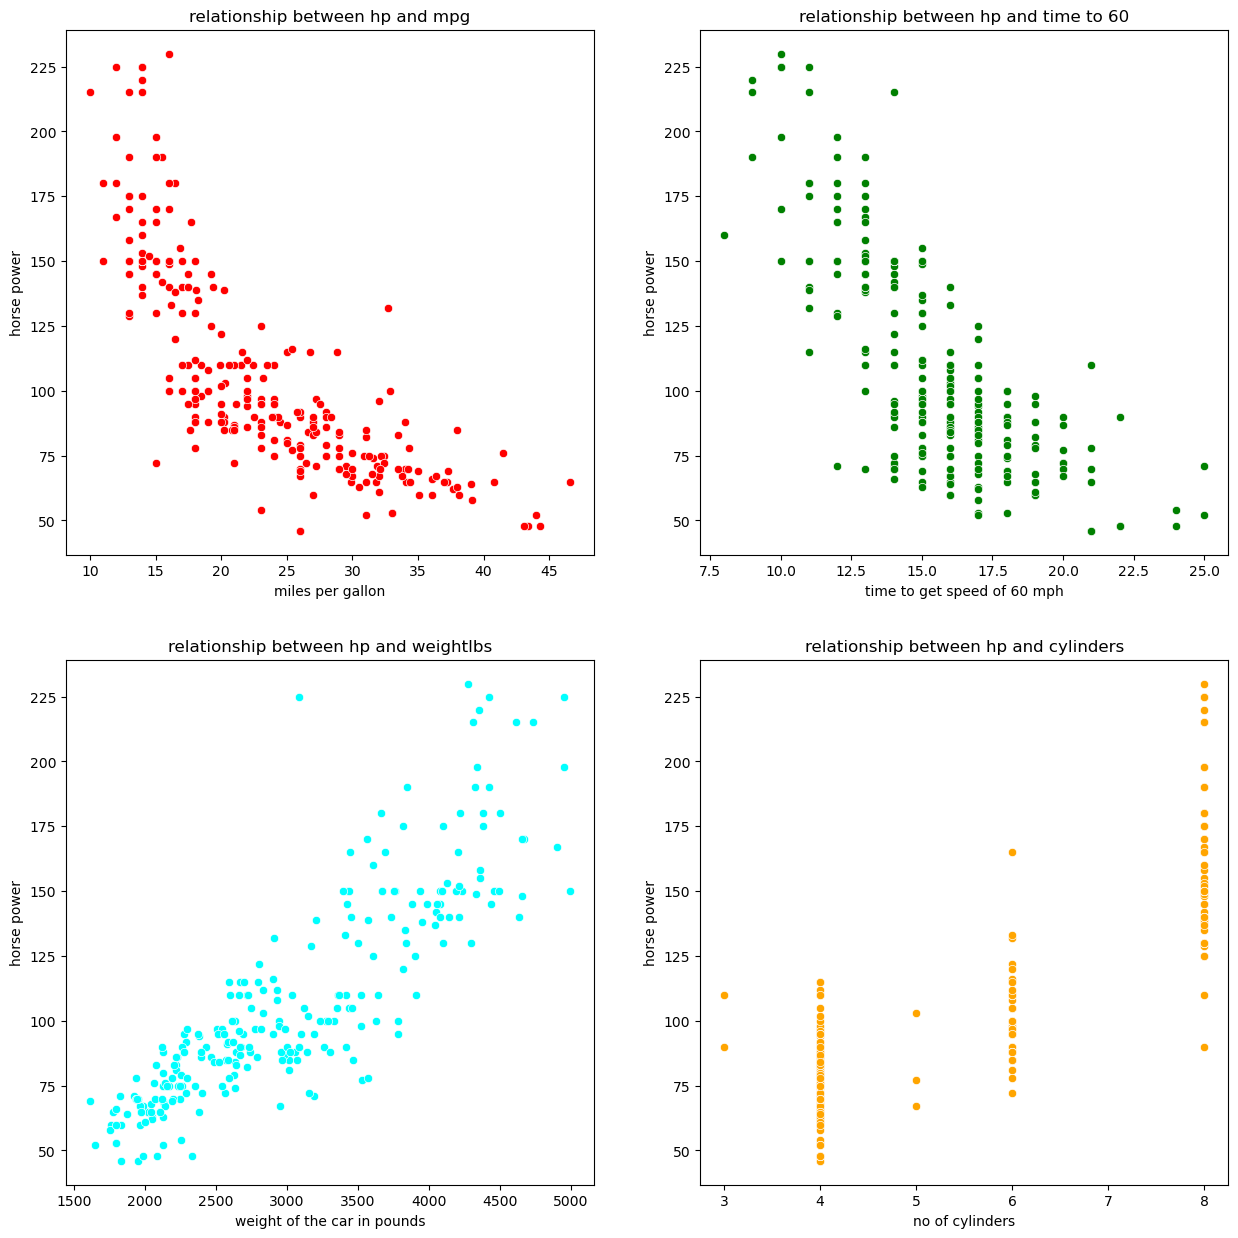

In [51]:
fig,axes=plt.subplots(2,2,figsize=(15,15))
plt.subplot(2,2,1)
sns.scatterplot(x=df['mpg'],y=df['hp'],data=df,color='red')
plt.xlabel('miles per gallon')
plt.ylabel('horse power')
plt.title('relationship between hp and mpg')
plt.subplot(2,2,2)
sns.scatterplot(x=df['time-to-60'],y=df['hp'],data=df,color='green')
plt.xlabel('time to get speed of 60 mph')
plt.ylabel('horse power')
plt.title('relationship between hp and time to 60')
plt.subplot(2,2,3)
sns.scatterplot(x=df['weightlbs'],y=df['hp'],data=df,color='cyan')
plt.xlabel('weight of the car in pounds')
plt.ylabel('horse power')
plt.title('relationship between hp and weightlbs')
plt.subplot(2,2,4)
sns.scatterplot(x=df['cylinders'],y=df['hp'],data=df,color='orange')
plt.xlabel('no of cylinders')
plt.ylabel('horse power')
plt.title('relationship between hp and cylinders')
plt.show()

from the above 4 graphs we can clearly see that horsepower is related to different columns 

now check the above with the help of heatmap

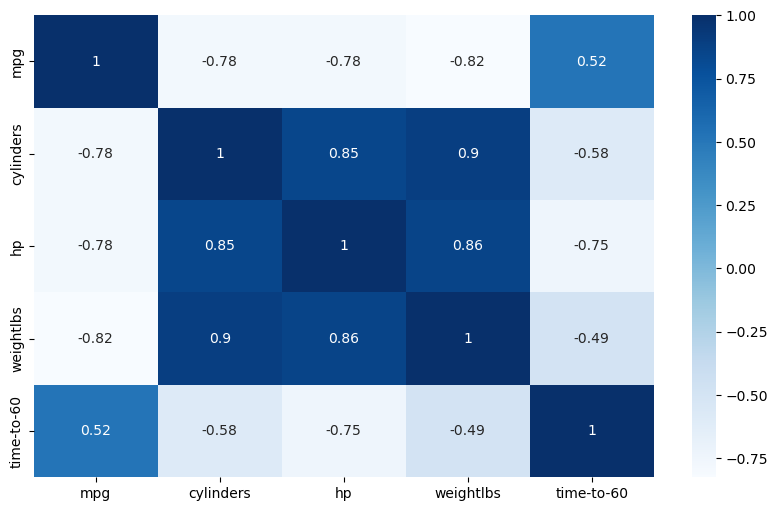

In [57]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['mpg', 'cylinders', 'hp', 'weightlbs', 'time-to-60']].corr(),annot=True,cmap='Blues')
plt.show()

from heatmap it is varified that mpg,time to 60 is strongly negatively correlated to hp and cylinders and weights is strongly positively correleated to hp. 

Text(0.5, 1.0, 'hp vs time-to-60 in lbs in Europe')

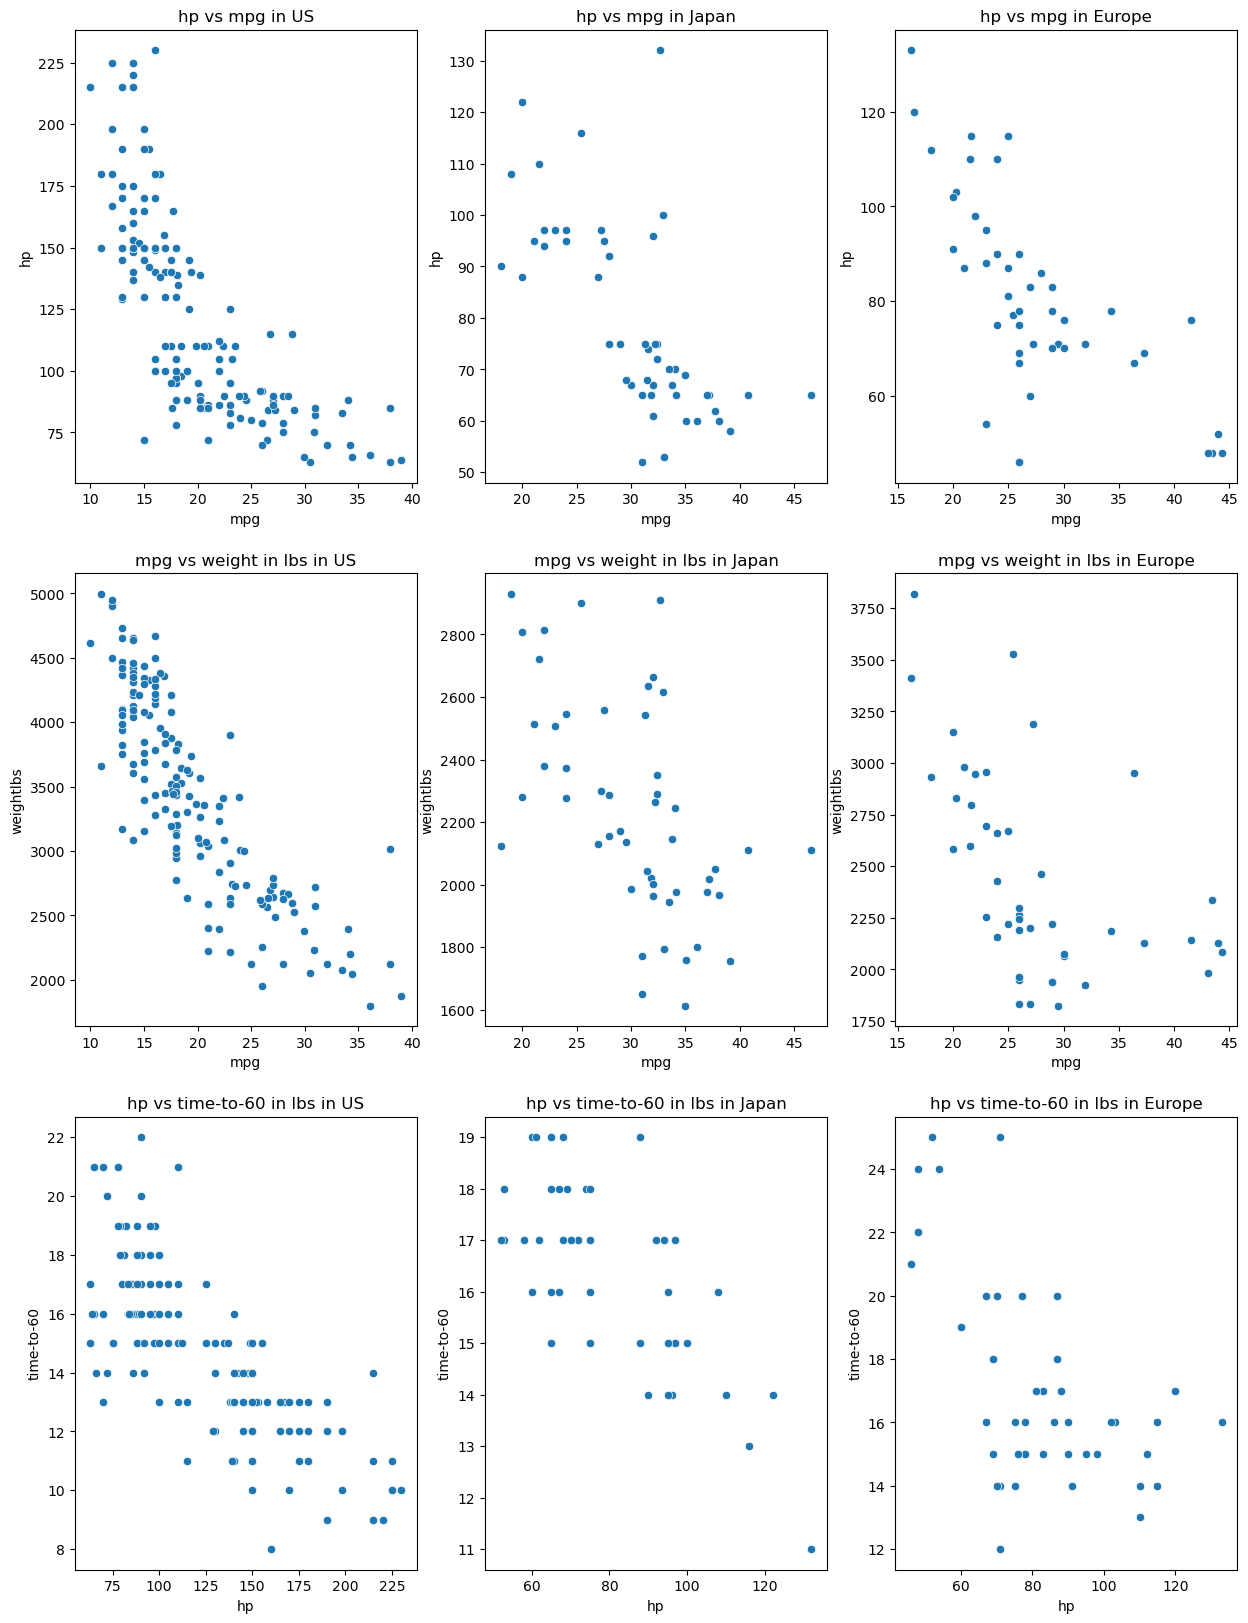

In [66]:
fig,axes=plt.subplots(3,3,figsize=(15,20))
plt.subplot(3,3,1)
sns.scatterplot(x=df[df['brand']==' US.']['mpg'],y=df[df['brand']==' US.']['hp'],data=df)
plt.title('hp vs mpg in US')
plt.subplot(3,3,2)
sns.scatterplot(x=df[df['brand']==' Japan.']['mpg'],y=df[df['brand']==' Japan.']['hp'],data=df)
plt.title('hp vs mpg in Japan')
plt.subplot(3,3,3)
sns.scatterplot(x=df[df['brand']==' Europe.']['mpg'],y=df[df['brand']==' Europe.']['hp'],data=df)
plt.title('hp vs mpg in Europe')
plt.subplot(3,3,4)
sns.scatterplot(x=df[df['brand']==' US.']['mpg'],y=df[df['brand']==' US.']['weightlbs'],data=df)
plt.title('mpg vs weight in lbs in US')
plt.subplot(3,3,5)
sns.scatterplot(x=df[df['brand']==' Japan.']['mpg'],y=df[df['brand']==' Japan.']['weightlbs'],data=df)
plt.title('mpg vs weight in lbs in Japan')
plt.subplot(3,3,6)
sns.scatterplot(x=df[df['brand']==' Europe.']['mpg'],y=df[df['brand']==' Europe.']['weightlbs'],data=df)
plt.title('mpg vs weight in lbs in Europe')
plt.subplot(3,3,7)
sns.scatterplot(x=df[df['brand']==' US.']['hp'],y=df[df['brand']==' US.']['time-to-60'],data=df)
plt.title('hp vs time-to-60 in lbs in US')
plt.subplot(3,3,8)
sns.scatterplot(x=df[df['brand']==' Japan.']['hp'],y=df[df['brand']==' Japan.']['time-to-60'],data=df)
plt.title('hp vs time-to-60 in lbs in Japan')
plt.subplot(3,3,9)
sns.scatterplot(x=df[df['brand']==' Europe.']['hp'],y=df[df['brand']==' Europe.']['time-to-60'],data=df)
plt.title('hp vs time-to-60 in lbs in Europe')

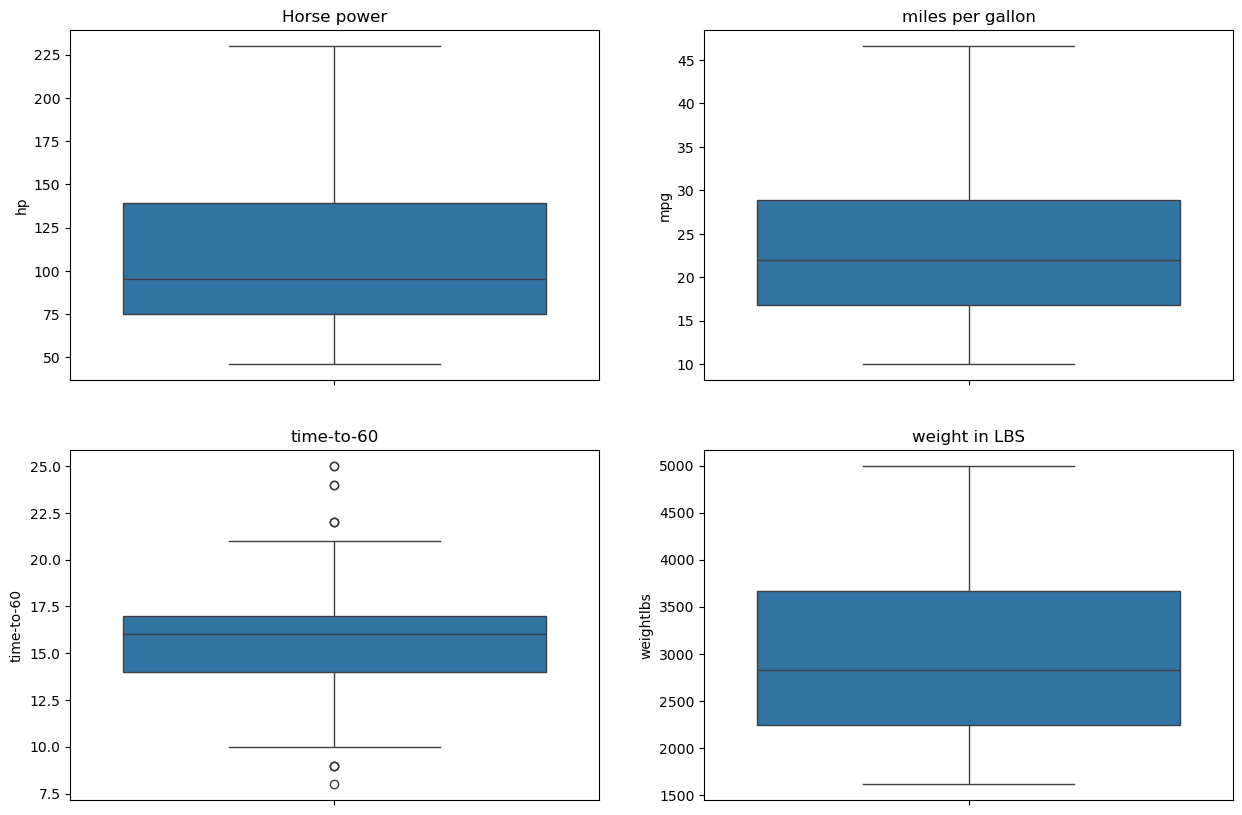

In [71]:
fig=plt.subplots(2,2,figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(df['hp'])
plt.title('Horse power')
plt.subplot(2,2,2)
sns.boxplot(df['mpg'])
plt.title('miles per gallon')
plt.subplot(2,2,3)
sns.boxplot(df['time-to-60'])
plt.title('time-to-60')
plt.subplot(2,2,4)
sns.boxplot(df['weightlbs'])
plt.title('weight in LBS')
plt.show()

by looking at the boxplots we can see that time to 60 contains some outliers only , otherwise data is normally distributed.

In [75]:
df.columns

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand'],
      dtype='object')

In [83]:
corr=df[['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year']].corr()
corr


,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
mpg,1.000000,-0.776599,-0.803830,-0.779954,-0.824945,0.520401,0.561719
cylinders,-0.776599,1.000000,0.951529,0.847450,0.897247,-0.583449,-0.329193
cubicinches,-0.803830,0.951529,1.000000,0.907341,0.930027,-0.613344,-0.359215
hp,-0.779954,0.847450,0.907341,1.000000,0.863467,-0.745310,-0.393079
weightlbs,-0.824945,0.897247,0.930027,0.863467,1.000000,-0.488671,-0.281156
time-to-60,0.520401,-0.583449,-0.613344,-0.745310,-0.488671,1.000000,0.315549
year,0.561719,-0.329193,-0.359215,-0.393079,-0.281156,0.315549,1.000000


<Axes: >

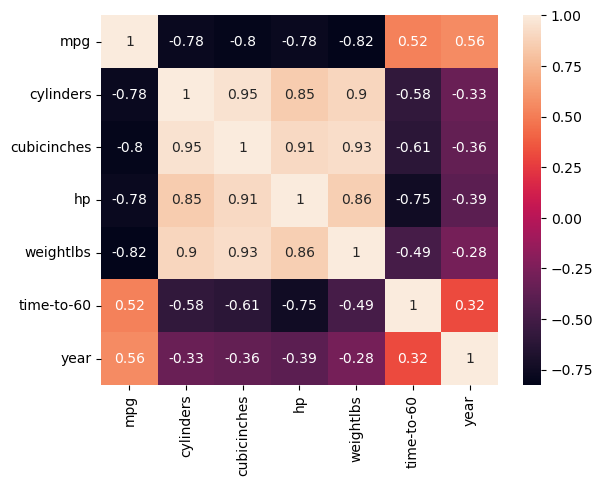

In [85]:
sns.heatmap(corr,annot=True)

making heatmap for all the columns.

now making some different visulations to have more idea about the data.

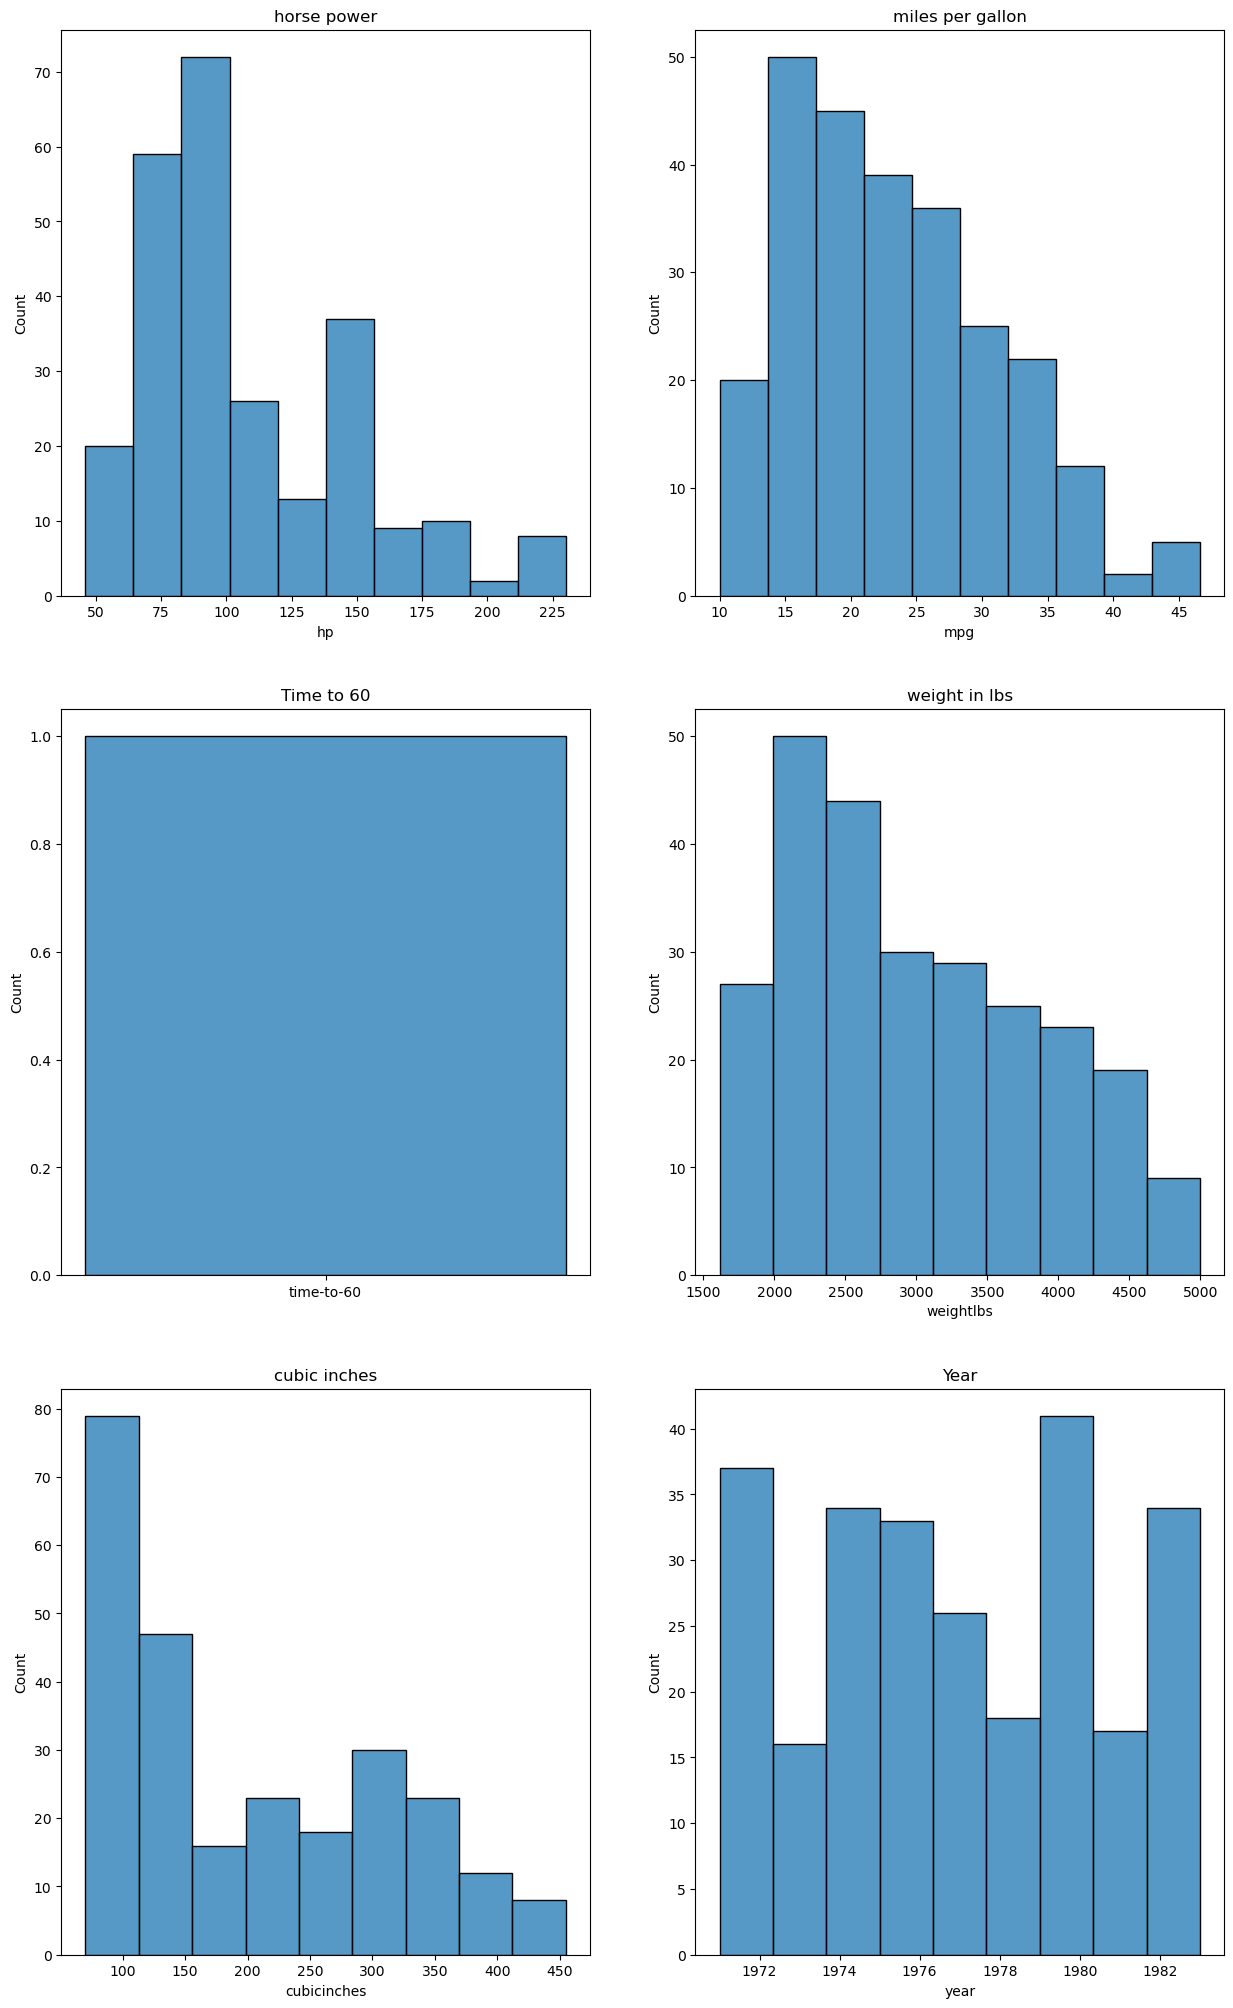

In [97]:
fig=plt.subplots(3,2,figsize=(15,25))
plt.subplot(3,2,1)
sns.histplot(df['hp'])
plt.title('horse power')
plt.subplot(3,2,2)
sns.histplot(df['mpg'])
plt.title('miles per gallon')
plt.subplot(3,2,3)
sns.histplot('time-to-60')
plt.title('Time to 60')
plt.subplot(3,2,4)
sns.histplot(df['weightlbs'])
plt.title('weight in lbs')
plt.subplot(3,2,5)
sns.histplot(df['cubicinches'])
plt.title('cubic inches')
plt.subplot(3,2,6)
sns.histplot(df['year'])
plt.title('Year')
plt.show()

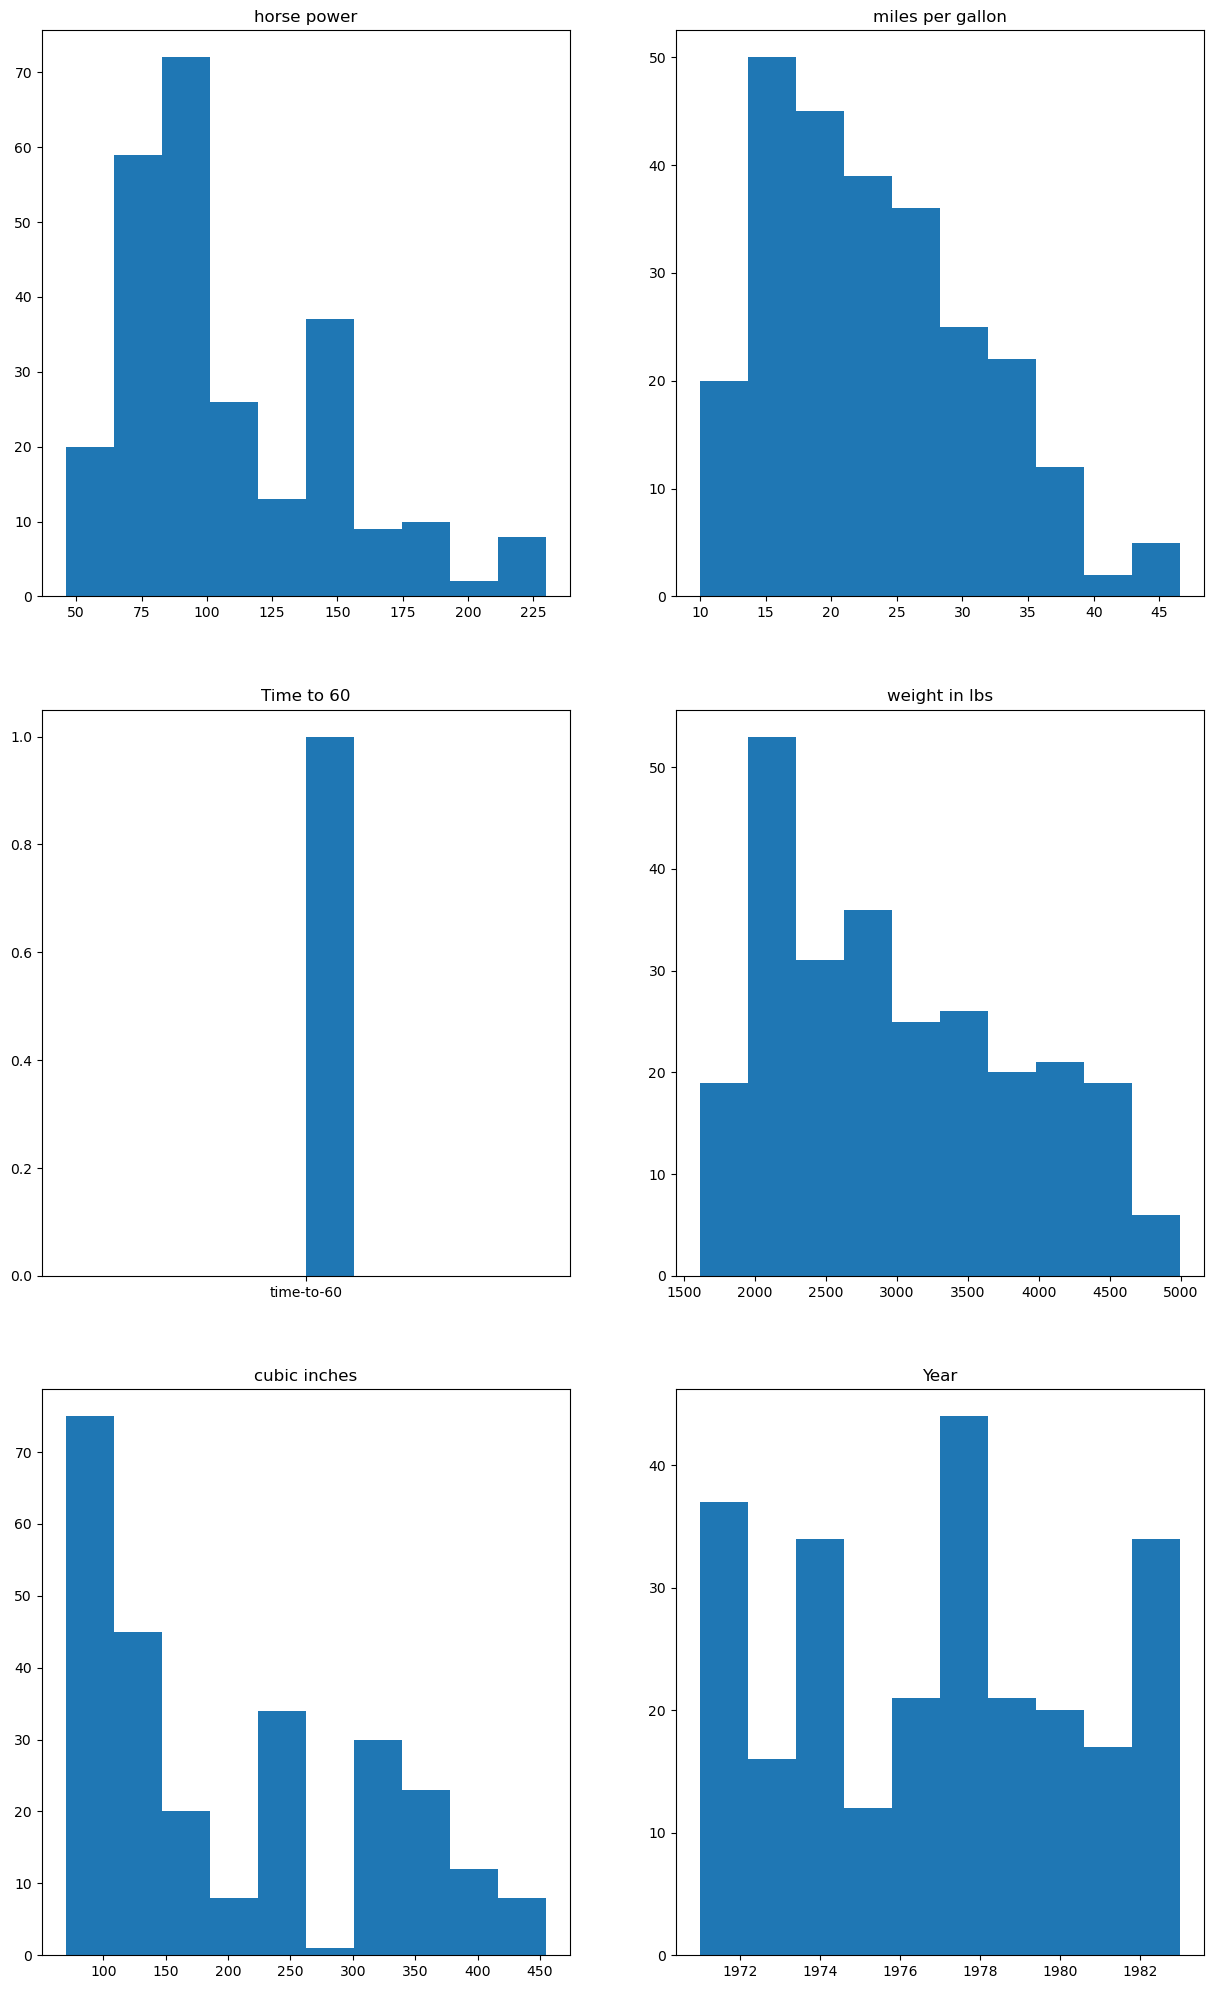

In [99]:
fig=plt.subplots(3,2,figsize=(15,25))
plt.subplot(3,2,1)
plt.hist(df['hp'])
plt.title('horse power')
plt.subplot(3,2,2)
plt.hist(df['mpg'])
plt.title('miles per gallon')
plt.subplot(3,2,3)
plt.hist('time-to-60')
plt.title('Time to 60')
plt.subplot(3,2,4)
plt.hist(df['weightlbs'])
plt.title('weight in lbs')
plt.subplot(3,2,5)
plt.hist(df['cubicinches'])
plt.title('cubic inches')
plt.subplot(3,2,6)
plt.hist(df['year'])
plt.title('Year')
plt.show()

***Thank You***